In [1]:
import numpy as np

## NumPy ndarray

In [2]:
data = np.random.randn(2, 3) #生成一个2行3列的随机数数组
print(data)
print(data.shape) #输出数组的形状
print(data.dtype) #输出数组的数据类型

[[ 0.80820158  0.54241007 -0.34289517]
 [ 0.83272154 -1.88132607  0.83600656]]
(2, 3)
float64


生成ndarray

In [3]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1) #将列表转换为ndarray
print(arr1)

data2 =[[1, 2, 3, 4], [5, 6, 7, 8]] #将嵌套列表转换为ndarray
arr2 = np.array(data2)
print(arr2)
print(arr2.ndim)
print(arr2.shape)
print(arr2.dtype)

[6.  7.5 8.  0.  1. ]
[[1 2 3 4]
 [5 6 7 8]]
2
(2, 4)
int64


In [4]:
print(np.zeros(10)) #生成一个包含10个0的ndarray
print(np.zeros((3, 6))) #生成一个3行6列的ndarray，元素为0
print(np.empty((2, 3, 2))) #生成一个2行3列2层的ndarray，元素为0，有可能不安全，有时候返回未初始化的垃圾数值
print(np.arange(15)) #生成一个包含0到14的ndarray
print(np.arange(5,8)) #生成一个包含5到7的ndarray
print(np.arange(5,20,3)) #生成一个包含5到19，步长为3的ndarray

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[[2.48473833e-315 0.00000000e+000]
  [6.90362608e-310 6.90364336e-310]
  [6.90364324e-310 6.90362608e-310]]

 [[6.90362608e-310 6.90362608e-310]
  [6.90364337e-310 6.90362608e-310]
  [6.90362608e-310 6.90362608e-310]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[5 6 7]
[ 5  8 11 14 17]


ndarray的数据类型

In [5]:
arr1 = np.array([1, 2, 3], dtype=np.float64) #指定数据类型为float64
arr2 = np.array([1, 2, 3], dtype=np.int32) #指定数据类型为int32

print(arr1.dtype)
print(arr2.dtype)

arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype) #输出当前数据类型
float_arr = arr.astype(np.float64) #将数据类型转换为float64
print(float_arr)
print(float_arr.dtype)

float64
int32
int64
[1. 2. 3. 4. 5.]
float64


如果把浮点数转换为整数则小数点后的部分被消除

## Numpy 数组算术

对应元素逐个进行运算

In [6]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr)
print(arr * arr) #对应元素相乘
print(arr - arr) #对应元素相减
print(1 / arr) #对应元素相除
print(arr ** 2) #对应元素平方
arr2 = np.array([[0, 4, 1], [7, 2, 12]])
print(arr2)
print(arr2 > arr) #对应元素进行比较，返回布尔值数组

[[1 2 3]
 [4 5 6]]
[[ 1  4  9]
 [16 25 36]]
[[0 0 0]
 [0 0 0]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[ 1  4  9]
 [16 25 36]]
[[ 0  4  1]
 [ 7  2 12]]
[[False  True False]
 [ True False  True]]


## 基础索引与切片

In [7]:
arr = np.arange(10)
print(arr)
print(arr[5]) #索引第6个元素
print(arr[5:8]) #切片第6到8个元素
arr[5:8] = 12 #将第6到8个元素赋值为12
print(arr)
arr_slice = arr[5:8] #将切片赋值给一个新变量
print(arr_slice)
arr_slice[1] = 12345 #修改切片中的元素
print(arr) #原数组也被修改了，因为切片是原数组的视图
arr_slice[:] = 64 #将切片中的所有元素赋值为64
print(arr) #原数组也被修改了

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]
[12 12 12]
[    0     1     2     3     4    12 12345    12     8     9]
[ 0  1  2  3  4 64 64 64  8  9]


如果传入了一个数值给数组的切片，数值被传递给了整个切片，区别于Python的内建列表，数组的切片是原数组的**视图**

如果想要拷贝：

In [8]:
#使用copy方法创建切片的副本
arr_slice = arr[5:8].copy()
arr_slice[1] = 12345
print(arr) #原数组没有被修改

[ 0  1  2  3  4 64 64 64  8  9]


## 布尔索引

In [9]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4) #生成一个7行4列的随机数数组
print(names)
print(data)
print(names == 'Bob') #返回一个布尔值数组，表示每个元素是否等于'Bob'
print(data[names == 'Bob']) #使用布尔值数组进行索引，返回对应行
print(data[names == 'Bob', 2:]) #返回对应行的第3列及之后的列
print(data[names == 'Bob', 3]) #返回对应行的第4列
print(data[names != 'Bob']) #返回不等于'Bob'的行
cond = names == 'Bob' #将布尔值数组赋值给一个变量
print(data[~cond]) #使用~操作符取反，返回不等于'Bob'的行
mask = (names == 'Bob') | (names == 'Will') #使用|操作符进行或运算
print(mask)
print(data[mask]) #返回等于'Bob'或'Will'的行
print(data[data < 0]) #返回所有小于0的元素

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[ 0.92503198 -1.92227397 -0.24133114 -0.39440693]
 [ 1.43667172  0.1499877  -1.72075197  1.00982222]
 [-2.10410718 -0.02224452 -0.86347849 -0.25267232]
 [-0.21095612  1.60839903 -1.51043883 -1.37562164]
 [-1.21024707  0.04907885 -1.02882531  1.27394113]
 [-0.33526708  1.3488128  -0.48760737 -0.35715362]
 [-2.3665159  -0.07797548  0.61252917  0.38470431]]
[ True False False  True False False False]
[[ 0.92503198 -1.92227397 -0.24133114 -0.39440693]
 [-0.21095612  1.60839903 -1.51043883 -1.37562164]]
[[-0.24133114 -0.39440693]
 [-1.51043883 -1.37562164]]
[-0.39440693 -1.37562164]
[[ 1.43667172  0.1499877  -1.72075197  1.00982222]
 [-2.10410718 -0.02224452 -0.86347849 -0.25267232]
 [-1.21024707  0.04907885 -1.02882531  1.27394113]
 [-0.33526708  1.3488128  -0.48760737 -0.35715362]
 [-2.3665159  -0.07797548  0.61252917  0.38470431]]
[[ 1.43667172  0.1499877  -1.72075197  1.00982222]
 [-2.10410718 -0.02224452 -0.86347849 -0.25267232]
 [-1.21024

## 神奇索引：用整数数组进行数据索引

In [10]:
arr = np.empty((8, 4)) #生成一个8行4列的空数组
for i in range(8):
	arr[i] = i #将每行赋值为行号
print(arr)
arr2 = arr[[4, 3, 0, 6]] #使用整数数组进行索引，返回指定行
print(arr2)
arr3 = arr[[-3, -5, -7]] #使用负数索引，返回倒数第3、第5、第7行
print(arr3)
arr4 = np.arange(32).reshape((8, 4)) #生成一个8行4列的数组，元素为0到31
print(arr4)
print(arr4[[1, 5, 7, 2], [0, 3, 1, 2]]) #返回(1,0)、(5,3)、(7,1)、(2,2)位置的元素
print(arr4[[1, 5, 7, 2]][:, [0, 3, 1, 2]]) #先选取行，再选取列

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]
[[5. 5. 5. 5.]
 [3. 3. 3. 3.]
 [1. 1. 1. 1.]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[ 4 23 29 10]
[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


## 数据转置和换轴

In [11]:
arr = np.arange(15).reshape((3, 5)) #生成一个3行5列的数组，元素为0到14
print(arr)
print(arr.T) #转置数组
arr2 = np.random.randn(6, 3) #生成一个6行3列的随机数数组
print(arr2)
print(np.dot(arr2.T, arr2)) #计算arr2的转置与arr2的矩阵乘积  dot函数用于矩阵乘法

arr = np.arange(16).reshape((2, 2, 4)) #生成一个2层2行4列的数组，元素为0到15
print(arr)
print(arr.transpose((1, 0, 2))) #换轴操作，将第0轴和第1轴交换
print(arr.swapaxes(1, 2)) #换轴操作，将第1轴和第2轴交换(返回的是数据的视图，没有对数据进行复制)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[ 2.27117523  0.18676473  1.33666543]
 [-1.2801928  -1.16095917 -2.0145426 ]
 [ 0.8818865  -0.5987216  -0.94610592]
 [-0.58833584 -0.5861066   2.0680172 ]
 [ 0.91397295  0.76693635 -0.57230511]
 [-0.25815525  0.32865013  1.2176061 ]]
[[ 8.8229841   2.34336633  2.72635487]
 [ 2.34336633  2.78089801  1.90406398]
 [ 2.72635487  1.90406398 12.82696567]]
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]
[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


## ufunc：通用函数：快速的逐元素数组函数

在ndarray数据中进行逐元素操作的函数，一些函数接收一个或多个标量数值，产生一个或多个标量数值，而通用函数就是对这些函数的向量化封装

In [12]:
arr = np.arange(10)
print(np.sqrt(arr)) #计算平方根
print(np.exp(arr)) #计算e的指数次幂

x = np.random.randn(8)
y = np.random.randn(8)
print(x)
print(y)
print(np.maximum(x, y)) #逐元素比较，返回较大值组成的新数组

arr = np.random.randn(7) * 5
print(arr)
remainder, whole_part = np.modf(arr) #将小数部分和整数部分分开
print(remainder) #小数部分
print(whole_part) #整数部分
print(arr) #原数组没有被修改

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
[ 1.07344555 -2.21790335 -1.04686207 -0.94563796 -0.36846608  1.12391653
 -0.2173781  -0.24346594]
[ 0.34653862  0.77443874  0.43266471 -0.45931736 -0.95131696 -1.31767717
  2.91132691 -0.86597236]
[ 1.07344555  0.77443874  0.43266471 -0.45931736 -0.36846608  1.12391653
  2.91132691 -0.24346594]
[-2.37484579  2.86754973  7.37309918  3.46886018  3.80645874  5.96562164
  3.01439772]
[-0.37484579  0.86754973  0.37309918  0.46886018  0.80645874  0.96562164
  0.01439772]
[-2.  2.  7.  3.  3.  5.  3.]
[-2.37484579  2.86754973  7.37309918  3.46886018  3.80645874  5.96562164
  3.01439772]


一些可用的通用函数：

In [13]:
np.abs(arr) #计算绝对值
np.fabs(arr) #计算绝对值
np.sqrt(arr) #计算平方根
np.square(arr) #计算平方
np.exp(arr) #计算e的指数次幂
np.log(arr) #计算自然对数
np.log10(arr) #计算以10为底的对数
np.log2(arr) #计算以2为底的对数
np.log1p(arr) #计算log(1 + x)
np.sign(arr) #计算符号函数，返回-1, 0, 1
np.ceil(arr) #向上取整
np.floor(arr) #向下取整
np.rint(arr) #四舍五入取整
np.modf(arr) #将小数部分和整数部分分开，返回两个数组
np.isnan(arr) #判断是否为NaN，返回布尔值数组
np.isfinite(arr) #判断是否为有限数，返回布尔值数组
np.isinf(arr) #判断是否为无穷大，返回布尔值数组
np.cos(arr) #计算余弦
np.nan_to_num(arr) #将NaN替换为0，无穷大替换为最大有限数，无穷小替换为最小有限数
np.logical_not(arr) #逐元素取反，返回布尔值数组

/tmp/ipykernel_11079/208123816.py:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr) #计算平方根
/tmp/ipykernel_11079/208123816.py:6: RuntimeWarning: invalid value encountered in log
  np.log(arr) #计算自然对数
/tmp/ipykernel_11079/208123816.py:7: RuntimeWarning: invalid value encountered in log10
  np.log10(arr) #计算以10为底的对数
/tmp/ipykernel_11079/208123816.py:8: RuntimeWarning: invalid value encountered in log2
  np.log2(arr) #计算以2为底的对数
/tmp/ipykernel_11079/208123816.py:9: RuntimeWarning: invalid value encountered in log1p
  np.log1p(arr) #计算log(1 + x)


array([False, False, False, False, False, False, False])

二元通用函数；

In [14]:
x = np.array([1, 5, 9, 3.5, 6])
y = np.array([2, 6, 1, 4.5, 3])
np.add(x, y) #逐元素相加
np.subtract(x, y) #逐元素相减
np.multiply(x, y) #逐元素相乘
np.divide(x, y) #逐元素相除
np.floor_divide(x, y) #逐元素向下取整除
np.power(x, y) #逐元素幂运算
np.mod(x, y) #逐元素取模
np.fmod(x, y) #逐元素取模
np.copysign(x, y) #将y的符号赋给x，返回新的数组
np.greater(x, y) #逐元素比较，返回布尔值数组
np.greater_equal(x, y) #逐元素比较，返回布尔值数组
np.less(x, y) #逐元素比较，返回布尔值数组
np.less_equal(x, y) #逐元素比较，返回布尔值数组
np.equal(x, y) #逐元素比较，返回布尔值数组
np.not_equal(x, y) #逐元素比较，返回布尔值数组
np.logical_and(x, y) #逐元素逻辑与，返回布尔值数组
np.logical_or(x, y) #逐元素逻辑或，返回布尔值数组
np.logical_xor(x, y) #逐元素逻辑异或，返回布尔值数组

array([False, False, False, False, False])

## 使用数组进行面向数组编程

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


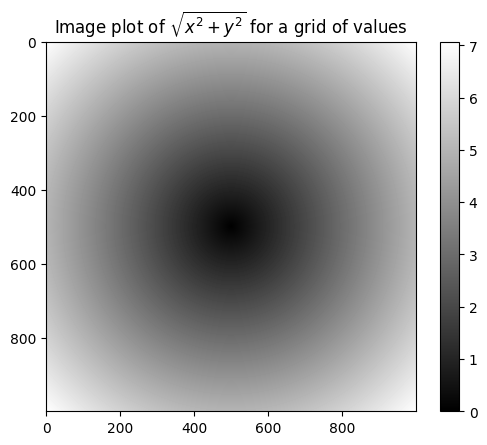

In [15]:
points = np.arange(-5, 5, 0.01) #生成一个包含-5到5，步长为0.01的数组

xs, ys = np.meshgrid(points, points) #生成网格点坐标矩阵
print(xs)
print(ys)

z = np.sqrt(xs ** 2 + ys ** 2) #计算每个点的距离
print(z)

import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray); plt.colorbar() #显示图像
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values") #添加标题
plt.show()

### 将条件逻辑作为数组操作

In [16]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = np.where(cond, xarr, yarr) #根据条件选择xarr或yarr的元素
print(result)

arr = np.random.randn(4, 4) #生成一个4行4列的随机数数组
print(arr)
print(arr > 0) #返回布尔值数组，表示每个元素是否大于0
print(np.where(arr > 0, 2, -2)) #根据条件选择2或-2
print(np.where(arr > 0, 2, arr)) #根据条件选择2或原数组的元素

[1.1 2.2 1.3 1.4 2.5]
[[ 1.32950692 -0.24189133  0.81992014  0.08467417]
 [-1.53283693  0.26432889  0.47006092 -1.31931504]
 [ 0.39542453  0.64251546  0.71895832 -0.03810505]
 [ 0.53153392  0.69364549  0.64202468  1.62738219]]
[[ True False  True  True]
 [False  True  True False]
 [ True  True  True False]
 [ True  True  True  True]]
[[ 2 -2  2  2]
 [-2  2  2 -2]
 [ 2  2  2 -2]
 [ 2  2  2  2]]
[[ 2.         -0.24189133  2.          2.        ]
 [-1.53283693  2.          2.         -1.31931504]
 [ 2.          2.          2.         -0.03810505]
 [ 2.          2.          2.          2.        ]]


### 数学与统计方法

In [17]:
arr = np.random.randn(5, 4) #生成一个5行4列的随机数数组
print(arr)
print(arr.mean()) #计算所有元素的平均值
print(np.mean(arr)) #计算所有元素的平均值
print(arr.sum()) #计算所有元素的和
print(np.sum(arr)) #计算所有元素的和
print(arr.mean(axis=0)) #计算每列的平均值
print(arr.sum(axis=1)) #计算每行的和

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
print(arr.cumsum()) #计算累积和，不会聚合，会产生中间结果
print(arr.cumprod()) #计算累积积
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)
print(arr.cumsum(axis=0)) #计算每列的累积和
print(arr.cumprod(axis=1)) #计算每行的累积积

[[ 0.07189753 -0.00350468 -1.36320687 -1.11407126]
 [-1.00410529  0.87650785  0.98609122 -2.0337211 ]
 [-0.1050193   1.14248345 -1.79775768 -1.78338139]
 [ 0.31993631  0.08536567 -0.39385626  1.15844203]
 [-1.01525886  0.03605206 -0.56191742 -0.78402252]]
-0.3641523261186258
-0.3641523261186258
-7.283046522372516
-7.283046522372516
[-0.34650992  0.42738087 -0.6261294  -0.91135085]
[-2.40888528 -1.17522731 -2.54367493  1.16988774 -2.32514674]
[ 0  1  3  6 10 15 21 28]
[0 0 0 0 0 0 0 0]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


### 布尔值数组的方法

In [18]:
arr = np.random.randn(100) #生成一个包含100个随机数的数组
print((arr > 0).sum()) #计算大于0的元素个数
print((arr < 0).sum()) #计算小于0的元素个数

bools = np.array([False, False, True, False])
print(bools.any()) #判断是否有任何一个元素为True
print(bools.all()) #判断是否所有元素都为True

50
50
True
False


### 排序

In [19]:
arr = np.random.randn(6)
print(arr)
arr.sort() #对数组进行排序
print(arr)

arr = np.random.randn(5, 3) #生成一个5行3列的随机数数组
print(arr)
arr.sort(1) #对每行进行排序
print(arr)
arr.sort(0) #对每列进行排序
print(arr)

large_arr = np.random.randn(1000) #生成一个包含1000个随机数的数组
large_arr.sort() #对数组进行排序
print(large_arr[int(0.05 * len(large_arr))]) #获取第5百分位数的值

[ 0.05203099 -0.03523457  0.7360779   1.22844662  1.15443326  0.90830263]
[-0.03523457  0.05203099  0.7360779   0.90830263  1.15443326  1.22844662]
[[ 0.36255251  0.57515196  0.64356298]
 [ 0.21381713 -0.73901817  0.70620168]
 [ 1.06383279  0.99542252  0.08094739]
 [-0.57870388 -1.33993779  0.19243127]
 [ 0.0484276   0.26505334 -0.94791962]]
[[ 0.36255251  0.57515196  0.64356298]
 [-0.73901817  0.21381713  0.70620168]
 [ 0.08094739  0.99542252  1.06383279]
 [-1.33993779 -0.57870388  0.19243127]
 [-0.94791962  0.0484276   0.26505334]]
[[-1.33993779 -0.57870388  0.19243127]
 [-0.94791962  0.0484276   0.26505334]
 [-0.73901817  0.21381713  0.64356298]
 [ 0.08094739  0.57515196  0.70620168]
 [ 0.36255251  0.99542252  1.06383279]]
-1.5204630708602587


### 唯一值与其他集合逻辑

In [20]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names)) #返回唯一值组成的新数组
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
print(np.unique(ints)) #返回唯一值组成的新数组
print(sorted(set(names))) #使用set函数获取唯一值，再排序

values = np.array([6, 0, 0, 3, 2, 5, 6])
print(np.in1d(values, [2, 3, 6])) #判断values中的元素是否在[2,3,6]中，返回布尔值数组

['Bob' 'Joe' 'Will']
[1 2 3 4]
['Bob', 'Joe', 'Will']
[ True False False  True  True False  True]


## 使用数组进行文件输入和输出

In [21]:
arr = np.arange(10)
np.save('some_array', arr) #将数组保存到文件some_array.npy中
arr2 = np.load('some_array.npy') #从文件some_array.npy中加载数组
print(arr2)

arr = np.random.randn(6)
print(arr)
np.savez('array_archive.npz', a=arr, b=arr) #将多个数组保存到一个压缩文件中
arch = np.load('array_archive.npz') #从压缩文件中加载数组
print(arch['a']) #访问保存的数组
print(arch['b']) #访问保存的数组

[0 1 2 3 4 5 6 7 8 9]
[-1.21164109  0.22873822 -0.39245423  0.49032293 -0.43069157 -0.73512614]
[-1.21164109  0.22873822 -0.39245423  0.49032293 -0.43069157 -0.73512614]
[-1.21164109  0.22873822 -0.39245423  0.49032293 -0.43069157 -0.73512614]


## 线性代数

In [22]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])
print(x)
print(y)
print(x.dot(y)) #矩阵乘法
print(np.dot(x, y)) #矩阵乘法
print(x @ y) #矩阵乘法

from numpy.linalg import inv, qr

X = np.random.randn(5, 5)
mat = X.T.dot(X) #计算X的转置与X的矩阵乘积
print(mat)
print(inv(mat)) #计算矩阵的逆
print(mat.dot(inv(mat))) #验证矩阵与其逆的乘积为单位矩阵
q, r = qr(mat) #进行QR分解
print(q)
print(r)

[[1 2 3]
 [4 5 6]]
[[ 6 23]
 [-1  7]
 [ 8  9]]
[[ 28  64]
 [ 67 181]]
[[ 28  64]
 [ 67 181]]
[[ 28  64]
 [ 67 181]]
[[ 4.17397822  1.22905246 -0.09041535  2.38581688 -0.8251565 ]
 [ 1.22905246  4.05653536 -2.98594485  5.11544491  2.16803092]
 [-0.09041535 -2.98594485  3.78632692 -1.32516999 -1.78536365]
 [ 2.38581688  5.11544491 -1.32516999 10.46546852  2.45947836]
 [-0.8251565   2.16803092 -1.78536365  2.45947836  6.68016994]]
[[  0.41655157  -1.86885499  -1.19004136   0.64363827   0.10295916]
 [ -1.86885499  30.50289812  19.60945416 -11.87929515  -0.51592222]
 [ -1.19004136  19.60945416  12.91330797  -7.61862714  -0.25494472]
 [  0.64363827 -11.87929515  -7.61862714   4.75593027   0.14769893]
 [  0.10295916  -0.51592222  -0.25494472   0.14769893   0.20733924]]
[[ 1.00000000e+00  1.38777878e-15  1.55431223e-15 -4.71844785e-16
   2.77555756e-17]
 [ 6.10622664e-16  1.00000000e+00 -6.32827124e-15  3.49720253e-15
  -1.66533454e-16]
 [ 6.93889390e-16 -7.66053887e-15  1.00000000e+00 -4.4964

常用numpy.linalg函数：

In [23]:
import numpy.linalg as la 
np.diag(X) #提取对角线元素，返回一维数组
np.diag(np.diag(X)) #将一维数组转换为对角矩阵
np.dot(X, X) #矩阵点乘
np.trace(X) #计算矩阵的迹，即对角线元素之和
la.det(X) #计算矩阵的行列式
la.eig(X) #计算矩阵的特征值和特征向量
la.svd(X) #计算矩阵的奇异值分解
la.solve(X, np.eye(5)) #解线性方程组，等价于inv(X)
la.lstsq(X, np.eye(5)) #计算最小二乘解

/tmp/ipykernel_11079/1135300614.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  la.lstsq(X, np.eye(5)) #计算最小二乘解


(array([[-1.84166363e-01, -1.35509335e-01,  2.56481070e-03,
          5.16894752e-01,  3.11584304e-01],
        [ 2.37420090e+00,  4.47420674e+00,  7.70403983e-01,
         -1.96955955e+00,  6.12254164e-01],
        [ 1.99448380e+00,  2.65450551e+00,  3.61658456e-01,
         -1.21609930e+00,  5.28439672e-01],
        [-8.82786558e-01, -1.69076404e+00, -5.87228080e-01,
          7.58455801e-01, -4.44795583e-01],
        [ 1.81267528e-01, -1.12207620e-01,  2.55382241e-01,
          2.94026165e-01, -1.01090559e-01]]),
 array([], dtype=float64),
 5,
 array([3.97982298, 2.62991516, 1.93391563, 1.62669803, 0.14442331]))

## 伪随机数生成

In [24]:
samples = np.random.normal(size=(4, 4)) #生成一个4行4列的标准正态分布随机数数组
print(samples)
from numpy.random import randn
print(randn(4, 4)) #生成一个4行4列的标准正态分布随机数数组

print(np.random.seed(1234)) #设置随机数种子，保证每次生成的随机数相同
print(np.random.RandomState(1234).randn(10)) #生成一个十元素标准正态分布随机数数组

[[ 2.05723273  0.08531782 -0.28124268  1.21098734]
 [ 0.90222869  1.8175146  -0.37789166  0.80537335]
 [-0.71903262 -0.21614796 -0.15799666  0.68114898]
 [ 1.60393342 -0.56685124  2.65997668  0.07158371]]
[[-0.25675844 -0.73784437 -0.25972627  0.88278566]
 [-0.41955116  1.97110755 -0.77678535 -0.3291024 ]
 [-0.19226534  0.27409828  0.25575158  0.54435133]
 [-0.73812009  1.02724935  1.50876018 -1.17382652]]
None
[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495]


numpy.random的部分函数：

In [25]:
np.random.seed(1234) #设置随机数种子
np.random.permutation(10) #生成一个0到9的随机排列
np.random.shuffle(X) #将数组元素随机打乱顺序
np.random.rand(3, 2) #生成一个3行2列的均匀分布随机数数组
np.random.randint(0, 10, (3, 3)) #生成一个3行3列的0到9的随机整数数组
np.random.randn(4, 4) #生成一个4行4列的标准正态分布随机数数组
np.random.binomial(10, 0.5, size=10) #生成一个包含10个元素的二项分布随机数数组，参数为n=10，p=0.5
np.random.normal(size=(4, 4)) #生成一个4行4列的标准正态分布随机数数组
np.random.beta(a=2.0, b=5.0, size=(4, 4)) #生成一个4行4列的Beta分布随机数数组，参数为a=2.0，b=5.0
np.random.gamma(shape=2.0, scale=2.0, size=(4, 4)) #生成一个4行4列的Gamma分布随机数数组，参数为shape=2.0，scale=2.0
np.random.poisson(lam=3.0, size=(4, 4)) #生成一个4行4列的Poisson分布随机数数组，参数为lam=3.0
np.random.exponential(scale=1.0, size=(4, 4)) #生成一个4行4列的指数分布随机数数组，参数为scale=1.0
np.random.uniform(low=0.0, high=1.0, size=(4, 4)) #生成一个4行4列的均匀分布随机数数组，参数为low=0.0，high=1.0
np.random.chisquare(df=2.0, size=(4, 4)) #生成一个4行4列的卡方分布随机数数组，参数为df=2.0

array([[2.30154707, 5.54676118, 1.58241709, 0.36113555],
       [1.34182708, 2.41398791, 1.0896079 , 0.39096286],
       [3.04502764, 1.56686379, 3.04254334, 1.80056202],
       [0.23121157, 0.02151064, 0.02662588, 1.20278634]])

In [26]:
import gc

del mask, mat, names, points, q, r, randn, remainder, result, samples, values, whole_part, x, xarr, xs, y, yarr, ys, z
gc.collect()

7731

## 示例：随机漫步

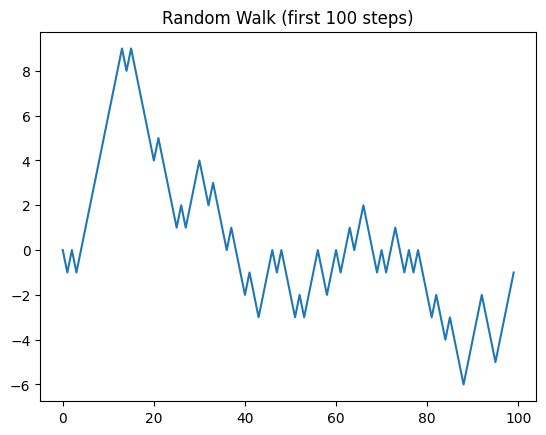

73


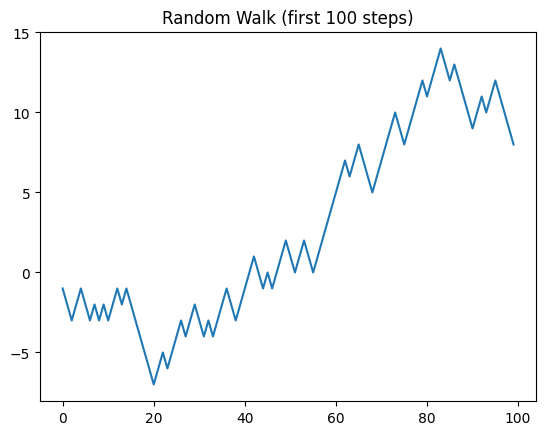

In [27]:
#用random模块实现随机漫步

import random

position = 0
steps = 1000
walk = [position]
for i in range(steps):
	step = 1 if random.randint(0, 1) else -1 #随机选择前进一步或后退一步
	position += step
	walk.append(position)

import matplotlib.pyplot as plt

plt.plot(walk[:100]) #绘制前100步的随机漫步路径
plt.title("Random Walk (first 100 steps)") #添加标题
plt.show()

#用numpy实现随机漫步

nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps) #生成一个包含1000个0或1的随机整数数组
steps = np.where(draws > 0, 1, -1) #将0替换为-1，1替换为1
walk = steps.cumsum() #计算累积和，得到随机漫步路径

print((np.abs(walk) >= 10).argmax()) #计算首次到达10或-10的位置
plt.plot(walk[:100]) #绘制前100步的随机漫步路径
plt.title("Random Walk (first 100 steps)") #添加标题
plt.show()


### 一次性模拟多次随机漫步

[123  67  49 ...  75  47  91]
5000


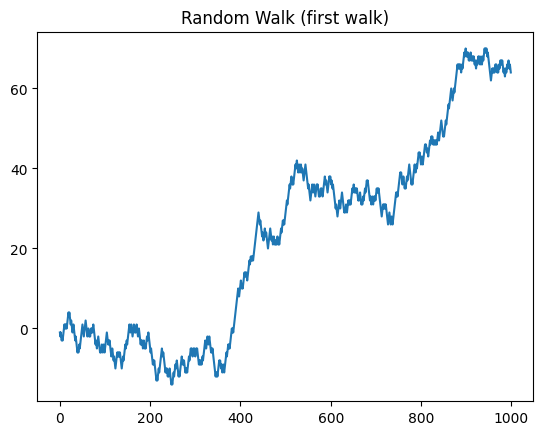

In [28]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) #生成一个包含5000行1000列的0或1的随机整数数组
steps = np.where(draws > 0, 1, -1) #将0替换为-1，1替换为1
walks = steps.cumsum(1) #计算每行的累积和，得到5000条随机漫步路径

hits10 = (np.abs(walks) >= 10).any(1) #判断每条路径是否到达10或-10
print((np.abs(walks[hits10]) >= 10).argmax(1)) #计算每条路径首次到达10或-10的位置
print(hits10.sum()) #计算有多少条路径到达10或-10

import matplotlib.pyplot as plt

plt.plot(walks[0]) #绘制第一条随机漫步路径
plt.title("Random Walk (first walk)") #添加标题
plt.show()